In [127]:
import h5py

snap = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/snapshot_127.0.hdf5','r')

In [128]:
def printname(name):
    print (name)
snap.visit(printname)

Config
Header
Parameters
PartType0
PartType0/AllowRefinement
PartType0/Coordinates
PartType0/Density
PartType0/ElectronAbundance
PartType0/EnergyDissipation
PartType0/GFM_AGNRadiation
PartType0/GFM_CoolingRate
PartType0/GFM_Metallicity
PartType0/GFM_Metals
PartType0/GFM_RProcess
PartType0/GFM_WindDMVelDisp
PartType0/GFM_WindHostHaloMass
PartType0/HighResGasMass
PartType0/InternalEnergy
PartType0/Machnumber
PartType0/MagneticField
PartType0/MagneticFieldDivergence
PartType0/Masses
PartType0/NeutralHydrogenAbundance
PartType0/ParticleIDs
PartType0/Potential
PartType0/StarFormationRate
PartType0/Velocities
PartType1
PartType1/Coordinates
PartType1/Masses
PartType1/ParticleIDs
PartType1/Potential
PartType1/Velocities
PartType2
PartType2/Coordinates
PartType2/Masses
PartType2/ParticleIDs
PartType2/Potential
PartType2/Velocities
PartType3
PartType3/Coordinates
PartType3/Masses
PartType3/ParticleIDs
PartType3/Potential
PartType3/Velocities
PartType4
PartType4/BirthDensity
PartType4/BirthPos
P

In [37]:
snap.get('Header')

<HDF5 group "/Header" (0 members)>

In [34]:
list(snap.items())

[('Config', <HDF5 group "/Config" (0 members)>),
 ('Header', <HDF5 group "/Header" (0 members)>),
 ('Parameters', <HDF5 group "/Parameters" (0 members)>),
 ('PartType0', <HDF5 group "/PartType0" (23 members)>),
 ('PartType1', <HDF5 group "/PartType1" (5 members)>),
 ('PartType2', <HDF5 group "/PartType2" (5 members)>),
 ('PartType3', <HDF5 group "/PartType3" (5 members)>),
 ('PartType4', <HDF5 group "/PartType4" (15 members)>),
 ('PartType5', <HDF5 group "/PartType5" (31 members)>),
 ('PartType6', <HDF5 group "/PartType6" (2 members)>)]

In [148]:
%%time
import gc
import joblib
import h5py

dir_path = pathlib.Path('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127')


def load(path):
    with h5py.File(path,'r') as snap:
        pstr = snap['PartType4/Coordinates'][()]
        pdrk = snap['PartType1/Coordinates'][()]

    return {'StrPos': pstr, 'DrkPos': pdrk}

with joblib.Parallel(n_jobs=8) as P:
    results = P(
        joblib.delayed(load)(path)
        for path in dir_path.glob('*.hdf5'))
    
# results = np.vstack(results)
gc.collect()

CPU times: user 5.47 s, sys: 27.9 s, total: 33.4 s
Wall time: 40.5 s


5218

In [180]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

aa = np.array([[11, 22], [33, 44]])
bb = np.array([[55, 66]])

In [181]:
ab = [{'A':a, 'B':b},{'A':aa, 'B':bb}]

In [192]:
%%time
# np.concatenate((a, b), axis=0)
for i in ab:
    
    c = np.concatenate(i['A'])

CPU times: user 61 µs, sys: 16 µs, total: 77 µs
Wall time: 87 µs


In [194]:
%%time
c = np.concatenate([i['A'] for i in ab],axis=0)

CPU times: user 31 µs, sys: 8 µs, total: 39 µs
Wall time: 47 µs


In [195]:
print(c)

[[ 1  2]
 [ 3  4]
 [11 22]
 [33 44]]


In [179]:
ab[0]['A']

array([[1, 2],
       [3, 4]])

In [155]:
for r in results:
    pos_str = np.concatenate(r['StrPos'])
#     pos_drk = np.concatenate(r['DrkPos'])

# velc = np.vstack([r["velocities"] for r in results])

In [147]:
np.shape(coordinates)

AttributeError: 'tuple' object has no attribute 'axis'

In [47]:
%matplotlib inline

In [114]:
x = coordinates[:,0]-46.95
y = coordinates[:,1]-49.45
z = coordinates[:,2]-51.7

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<0.1)

In [ ]:
with joblib.Parallel(n_jobs=10) as P:
    results = P(
        joblib.delayed(_plot)(x,y))

CPU times: user 6.09 s, sys: 957 ms, total: 7.04 s
Wall time: 526 ms


(-0.1, 0.1)

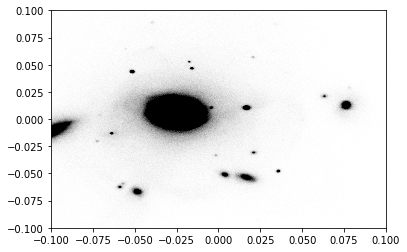

In [121]:
%%time
import matplotlib.pyplot as plt
plt.plot(x[mask],y[mask],'.k',markersize=0.005)
# def _plot(x,y):
# plt.hexbin(x,y)
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)

CPU times: user 5.99 s, sys: 987 ms, total: 6.98 s
Wall time: 466 ms


(-0.1, 0.1)

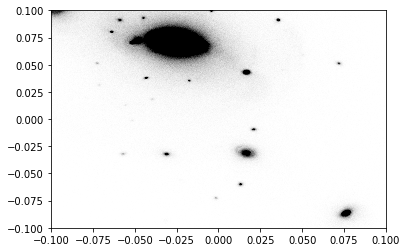

In [122]:
%%time
import matplotlib.pyplot as plt
plt.plot(x[mask],z[mask],'.k',markersize=0.005)
# def _plot(x,y):
# plt.hexbin(x,y)
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)

In [110]:
len(x[mask])

5075528

In [124]:
import h5py
subhalo = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/fof_subhalo_tab_127.0.hdf5','r')

In [125]:
def printname(name):
    print (name)
subhalo.visit(printname)

Config
Group
Group/GroupBHMass
Group/GroupBHMdot
Group/GroupCM
Group/GroupFirstSub
Group/GroupGasMetalFractions
Group/GroupGasMetallicity
Group/GroupLen
Group/GroupLenType
Group/GroupMass
Group/GroupMassType
Group/GroupNsubs
Group/GroupPos
Group/GroupRadioLuminosity
Group/GroupSFR
Group/GroupStarMetalFractions
Group/GroupStarMetallicity
Group/GroupVel
Group/GroupWindMass
Group/GroupXrayLuminosity
Group/Group_M_Crit200
Group/Group_M_Crit500
Group/Group_M_Mean200
Group/Group_M_TopHat200
Group/Group_R_Crit200
Group/Group_R_Crit500
Group/Group_R_Mean200
Group/Group_R_TopHat200
Header
IDs
Parameters
Subhalo
Subhalo/SubhaloBHMass
Subhalo/SubhaloBHMdot
Subhalo/SubhaloBfldDisk
Subhalo/SubhaloBfldHalo
Subhalo/SubhaloCM
Subhalo/SubhaloGasMetalFractions
Subhalo/SubhaloGasMetalFractionsHalfRad
Subhalo/SubhaloGasMetalFractionsMaxRad
Subhalo/SubhaloGasMetalFractionsSfr
Subhalo/SubhaloGasMetalFractionsSfrWeighted
Subhalo/SubhaloGasMetallicity
Subhalo/SubhaloGasMetallicityHalfRad
Subhalo/SubhaloGasMet

In [123]:
mass = snap['Subhalo/SubhaloMass'][()]

KeyError: 'Unable to open object (component not found)'

In [35]:
import numpy as np
print (mass[0:20])

[[48.81521  46.704514 53.605064]
 [48.71576  47.06235  53.33718 ]
 [48.919083 46.710922 53.67597 ]
 [48.735348 46.852665 53.30065 ]
 [48.89179  46.862267 53.576065]
 [48.91988  46.784466 53.569084]
 [48.9828   46.713398 53.806248]
 [48.760723 46.83252  53.529392]
 [48.759987 47.103146 53.325256]
 [48.815907 46.81181  53.602814]
 [48.739883 46.615498 53.405083]
 [48.890602 46.87211  53.574818]
 [48.935722 46.917114 53.51208 ]
 [49.03283  46.796837 53.52568 ]
 [48.757614 47.0261   53.293495]
 [48.79729  47.15016  53.432224]
 [48.845337 47.304108 53.43652 ]
 [48.49495  47.068806 53.38823 ]
 [48.653038 46.689644 53.635647]
 [48.8676   46.785717 53.432316]]


In [37]:
mass = snap['Subhalo/SubhaloCM'][()]
print (mass[0:20])

[[48.82009  46.723328 53.597187]
 [48.716347 47.062702 53.338043]
 [48.91892  46.71065  53.67589 ]
 [48.735714 46.853073 53.300694]
 [48.891224 46.866146 53.574993]
 [48.919044 46.783905 53.569515]
 [48.982113 46.713524 53.80575 ]
 [48.7608   46.832073 53.52889 ]
 [48.76002  47.103184 53.325203]
 [48.815678 46.811768 53.602715]
 [48.739925 46.6154   53.40519 ]
 [48.89053  46.872246 53.574654]
 [48.93596  46.918148 53.511826]
 [49.033127 46.796417 53.525726]
 [48.75821  47.02638  53.293392]
 [48.79735  47.150143 53.432236]
 [48.84515  47.30383  53.4365  ]
 [48.494938 47.068516 53.388268]
 [48.653114 46.689617 53.63557 ]
 [48.86765  46.785767 53.43235 ]]
